In [3]:
from drn_interactions.spikes import SpikesHandler, SpikesHandlerMulti
from drn_interactions.load import get_fig_dir
import drn_interactions.load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:
outdir = get_fig_dir() / "ephys_model"
outdir.mkdir(exist_ok=True, parents=True)

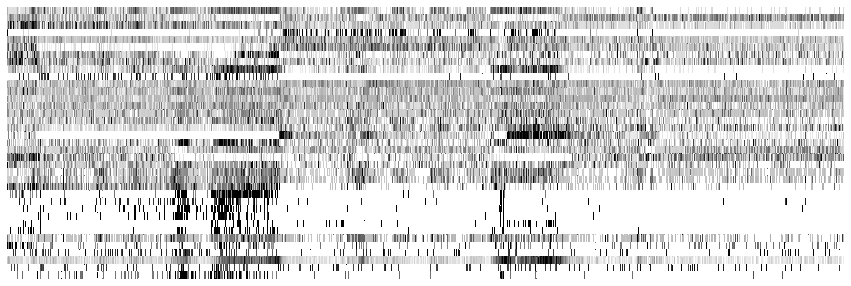

In [6]:
sh = SpikesHandlerMulti(block=["pre", "base_shock", "post_base_shock", "chal", "chal_shock", "post_chal_shock", "way"], bin_width=0.5, session_names=["hamilton_37"], t_start=0)
df = sh.binned_piv.reset_index().assign(bin=lambda x: x.bin.divide(60).round().astype(int)).set_index("bin").transpose()

_, ax = plt.subplots(figsize=(15, 5))
vals = df.values

vals = TfidfTransformer().fit_transform(vals).toarray()



sns.heatmap(vals, cmap="Greys", ax=ax, cbar=False, xticklabels=False, yticklabels=False, robust=True)
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.savefig(outdir / "long_recordings_2h_saline.png", dpi=300)

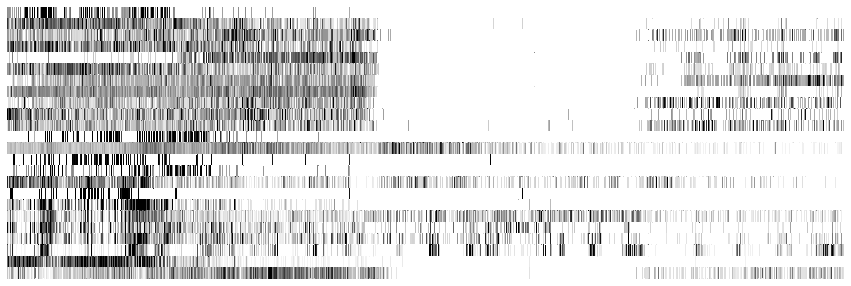

In [7]:
sh = SpikesHandlerMulti(block=["pre", "base_shock", "post_base_shock", "chal", "chal_shock", "post_chal_shock", "way"], bin_width=0.5, session_names=["hamilton_36"], t_start=0)
df = sh.binned_piv.reset_index().assign(bin=lambda x: x.bin.divide(60).round().astype(int)).set_index("bin").transpose()

vals = df.values
vals = TfidfTransformer().fit_transform(vals).toarray()

_, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(vals, cmap="Greys", ax=ax, cbar=False, xticklabels=False, yticklabels=False, robust=True)
plt.savefig(outdir / "long_recordings_2h_citalopram.png", dpi=300)

In [2]:
# sh = SpikesHandlerMulti(
#     block=["pre", "base_shock", "post_base_shock", "chal", "chal_shock", "post_chal_shock", "way"], 
#     bin_width=0.5, 
#     session_names=["ESHOCK_09_LOC1"], t_start=0
#     )
# df = sh.binned_piv.reset_index().assign(bin=lambda x: x.bin.divide(60).round().astype(int)).set_index("bin").transpose()

# _, ax = plt.subplots(figsize=(15, 5))

# sns.heatmap(df, cmap="Greys", vmax=12, ax=ax, cbar=False, xticklabels=True, yticklabels=False)
# # pl

In [62]:
sh = SpikesHandlerMulti(
    block=["pre"], 
    bin_width=0.01, 
    session_names=["hamilton_37"], 
    t_start=0,
    t_stop=5,
    )
df = sh.binned_piv.reset_index().assign(bin=lambda x: x.bin.divide(60).round().astype(int)).set_index("bin").transpose()


In [63]:
df.sum(axis=1).sort_values(ascending=False).iloc[1::10]


neuron_id
1767    50
1812    23
1815    13
dtype: int64

In [79]:
df = sh.spikes.loc[lambda x:x.neuron_id.isin((1815, 1813))]



In [80]:

spikes_list = [g["spiketimes"].values for name, g in df.groupby("neuron_id")]

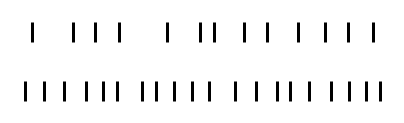

In [87]:
sns.set_theme(style="ticks", context="poster")
sns.set_context("poster")
f, ax = plt.subplots(figsize=(7, 2))
ax.eventplot(spikes_list, color="black", lineoffsets=[0, 3])
ax.axis("off")
plt.savefig(outdir / "example_spiketrains_5sec.svg", dpi=300, transparent=True)

In [89]:
from drn_interactions.load import load_waveforms

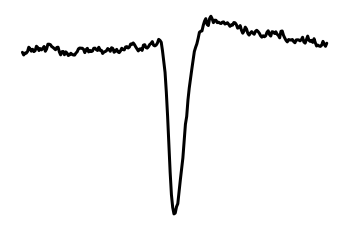

In [95]:
ax = load_waveforms().pivot(index="waveform_index", columns="neuron_id", values="waveform_value")[22].plot(color="black")

ax.axis("off")
plt.savefig(outdir / "example_waveform.svg", dpi=300, transparent=True)

In [ ]:
# plt.rc("axes.spines", top=False, right=False, left=False, bottom=False)